In [19]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,3.923313,120.946319,68.895706,20.440184,80.878834,31.947393,0.465133,33.510736,0.349693
std,3.327529,31.992394,19.183843,15.918604,117.748315,7.460975,0.329496,11.824817,0.477239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.363000,29.500000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,126.000000,36.425000,0.607750,41.000000,1.000000
max,15.000000,199.000000,114.000000,99.000000,846.000000,57.300000,2.329000,81.000000,1.000000


In [20]:
cols_zero_as_na = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_zero_as_na] = df[cols_zero_as_na].replace(0, np.nan)
df.isna().mean().sort_values(ascending=False)

Insulin                     0.487730
SkinThickness               0.299080
BloodPressure               0.046012
BMI                         0.010736
Glucose                     0.006135
ID                          0.000000
Pregnancies                 0.000000
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [14]:
df.isna().sum()

ID                            0
Pregnancies                   0
Glucose                       4
BloodPressure                30
SkinThickness               195
Insulin                     318
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
df.groupby("Outcome")[["Glucose", "BMI", "Age"]].mean()

,Glucose,BMI,Age
Outcome,,,
0,110.682464,30.773445,31.620283
1,142.252212,35.094273,37.026316


In [25]:

corr = df.corr(numeric_only=True)
# corr["Outcome"].sort_values(ascending=False)
corr

,Pregnancies,Glucose,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.103558,-0.028958,0.511983,0.211340
Glucose,0.103558,1.000000,0.124915,0.247014,0.489306
DiabetesPedigreeFunction,-0.028958,0.124915,1.000000,0.035520,0.173584
Age,0.511983,0.247014,0.035520,1.000000,0.218183
Outcome,0.211340,0.489306,0.173584,0.218183,1.000000


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


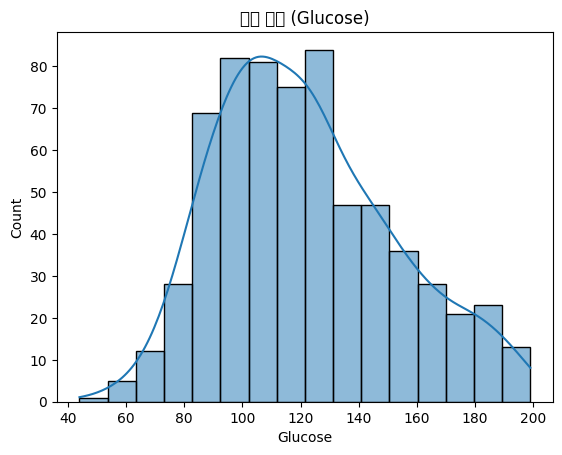

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Glucose"].dropna(), kde=True)
plt.title("혈당 분포 (Glucose)")
plt.show()

In [24]:
df.dtypes

ID                           object
Pregnancies                   int64
Glucose                     float64
BloodPressure                object
SkinThickness                object
Insulin                      object
BMI                          object
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [23]:
df["Glucose"].fillna(df["Glucose"].median(), inplace=True)


/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_39682/889310037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Glucose"].fillna(df["Glucose"].median(), inplace=True)
/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_39682/889310037.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) miss

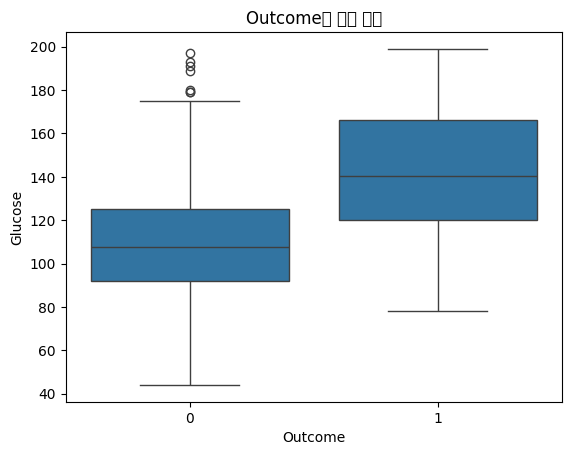

In [27]:
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Outcome별 혈당 차이")
plt.show()


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


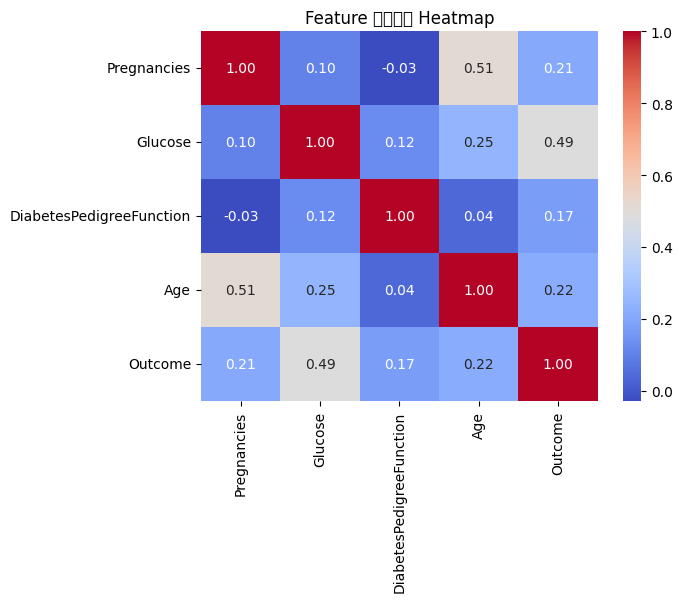

In [28]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature 상관관계 Heatmap")
plt.show()


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


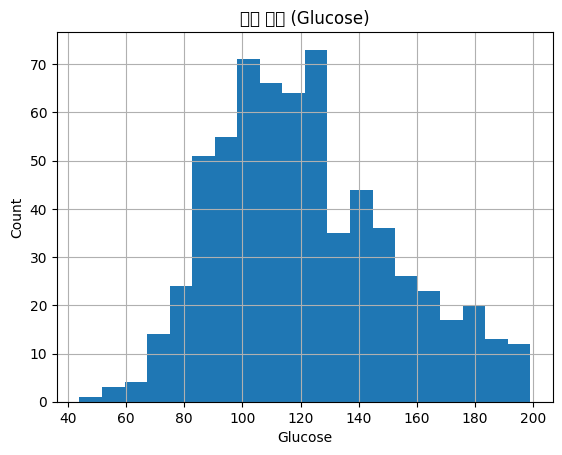

In [29]:

df['Glucose'].hist(bins=20)
plt.title("혈당 분포 (Glucose)")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Glucose', ylabel='BMI'>

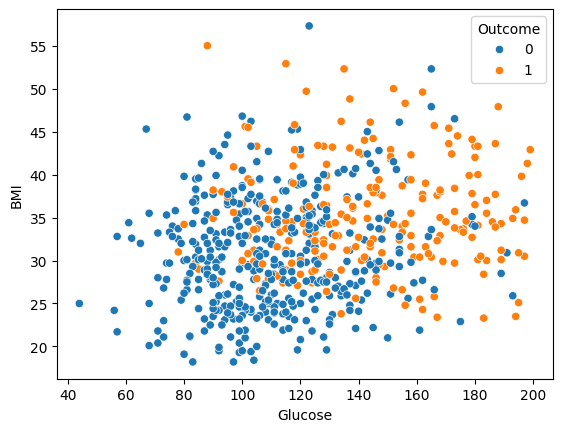

In [31]:

sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')

<Axes: xlabel='Outcome', ylabel='BMI'>

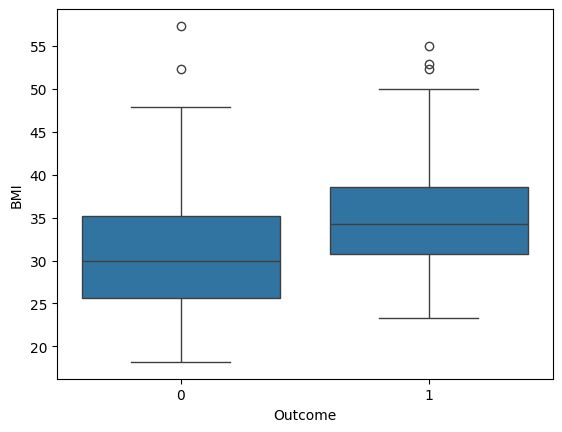

In [32]:
sns.boxplot(data=df, x='Outcome', y='BMI')
